<a href="https://colab.research.google.com/github/Hasinigammune/World_Data_K-means/blob/main/World_dataset_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [381]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler

#clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import requests

# seaborn library
import seaborn as sns

#plotting libraries
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import scatter_matrix
import plotly.express as px
import plotly.figure_factory as ff

import warnings
from tabulate import tabulate


In [382]:
# Import data from GitHub using the url bellow
data_path='https://raw.githubusercontent.com/Hasinigammune/World_Data_K-means/main/countries%20of%20the%20world.csv'
df=pd.read_csv(data_path,decimal=',')


In [383]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [385]:
#Removing null values
country = df.dropna()
country.isnull().sum()


Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [386]:
#Taking a subset of data
country = country.iloc[:, 0:10]
country.columns=["Country","Region","Population","Area","Pop.Density", "Coastline","Net.migration" , "Infant.mortality","GDP","Literacy"]
country.head()

,Country,Region,Population,Area,Pop.Density,Coastline,Net.migration,Infant.mortality,GDP,Literacy
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0


In [387]:
#descriptive statistics
country.describe()

,Population,Area,Pop.Density,Coastline,Net.migration,Infant.mortality,GDP,Literacy
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805028,16.495196,-0.206536,38.898156,9125.698324,81.944134
std,1.317639e+08,1.395657e+06,1379.352557,73.977601,4.751216,35.353003,9644.123141,19.837537
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950000
50%,6.940432e+06,1.184800e+05,66.900000,0.630000,0.000000,24.310000,5100.000000,90.900000
75%,2.086014e+07,4.964410e+05,164.700000,5.355000,0.395000,64.605000,12950.000000,97.800000
max,1.313974e+09,9.631420e+06,16183.000000,870.660000,23.060000,163.070000,37800.000000,100.000000


Text(0.5, 0.98, 'Histograms of world Dataset')

<Figure size 1000x1000 with 0 Axes>

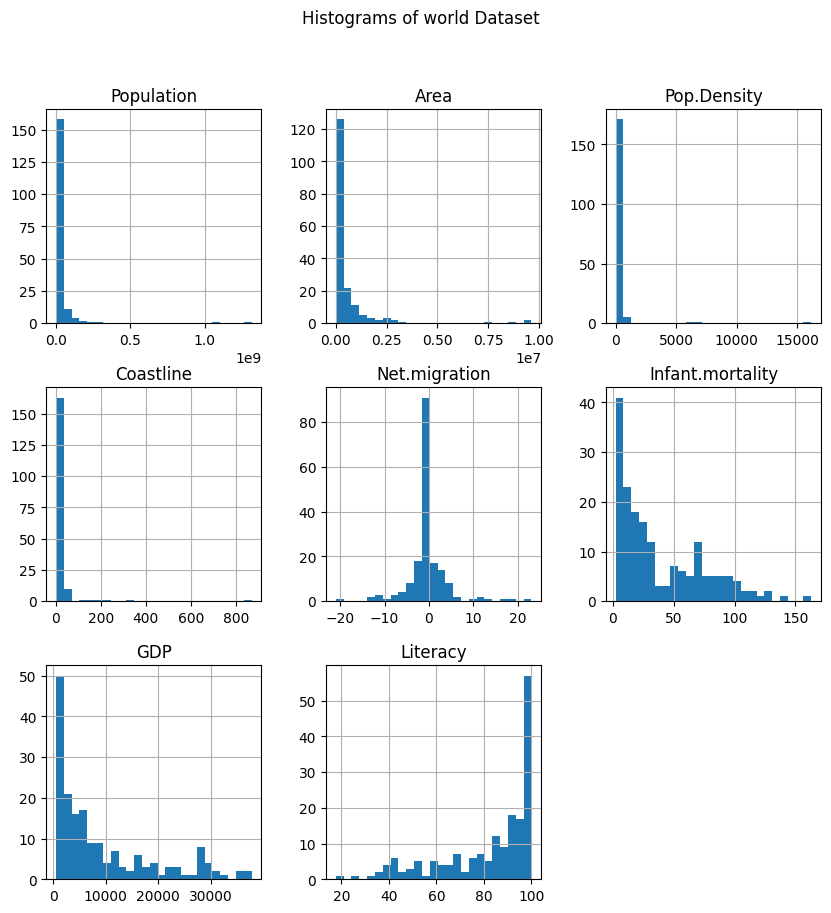

In [388]:
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(10, 10))

# Histograms
country.hist( bins=25,figsize=(10,10))
plt.suptitle("Histograms of world Dataset", fontsize=12)


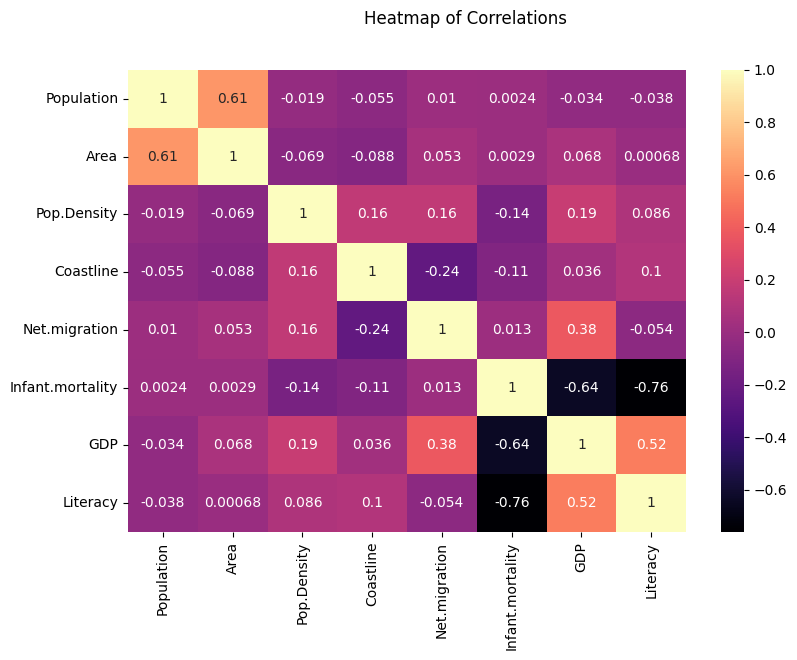

In [389]:
# Correlation analysis
fig , ax = plt.subplots(figsize = (9,6))
sns.heatmap(country.corr() , annot = True , ax = ax, cmap='magma')
plt.suptitle("Heatmap of Correlations", fontsize=12)
plt.show()


- As the correlation between most of the variables are very low, therefore, rather than going with the correlation-based distance, we can use metric-based distance for clustering.
- Also I would suggest standardizing the variables as they are in different scales and some have very high ranges.
- The panel histograms shows that the distributions of most of the variables are highly  right skewed.

**Hierarchical Clustering with Complete linkage**

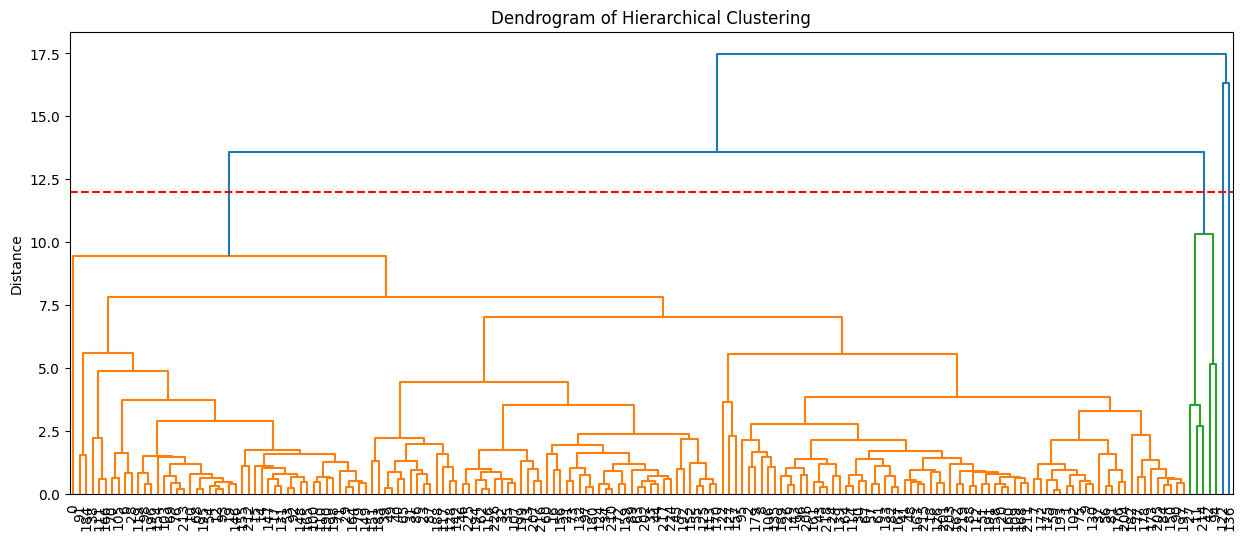

[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 4
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


In [390]:
# Scale the data (standardize the columns)
country_sub=country.drop(["Country","Region"],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_sc = scaler.fit_transform(country_sub)

# Perform hierarchical clustering
country_complete = linkage(country_sc, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 6))
dendrogram(country_complete, labels=country_sub.index, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('')
plt.ylabel('Distance')
plt.title('Dendrogram of Hierarchical Clustering')
plt.axhline(y=12, color='red', linestyle='--')
plt.show()

# Cut the tree at a specific height to obtain clusters
clusters = fcluster(country_complete, t=12, criterion='distance')
print(clusters)

In [391]:
# Convert the 'clusters' array to 'clust' variable
clust = clusters

# Get the number of observations within each cluster
table_counts = pd.Series(clust).value_counts().sort_index()

# Create a DataFrame with cluster means for each variable
c1 = country_sub[clust == 1].mean()
c2 = country_sub[clust == 2].mean()
c3 = country_sub[clust == 3].mean()
c4 = country_sub[clust == 4].mean()
d = pd.DataFrame([c1, c2, c3, c4], index=["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])

# Set column names
d.columns = ["Population", "Area", "Pop..Density", "Coastline", "Net.migration", "Infant.mortality", "GDP", "Literacy"]

# Convert 'd' DataFrame to a formatted string table
table_d = d.to_string()

# Display the tables
print("Number of observations within each cluster (Hierarchical Clustering):")
print(table_counts)
print("\nCluster means of the variables (Hierarchical Clustering):")
#print(table_d)
print(tabulate(d, headers=d.keys(), tablefmt='grid'))

Number of observations within each cluster (Hierarchical Clustering):
1    172
2      5
3      1
4      1
dtype: int64

Cluster means of the variables (Hierarchical Clustering):
+-----------+------------------+------------------+----------------+-------------+-----------------+--------------------+----------+------------+
|           |       Population |             Area |   Pop..Density |   Coastline |   Net.migration |   Infant.mortality |      GDP |   Literacy |
+===========+==================+==================+================+=============+=================+====================+==========+============+
| Cluster 1 |      1.86492e+07 | 362054           |        208.764 |     11.2474 |       -0.161221 |             39.575 |  8894.19 |    81.6901 |
+-----------+------------------+------------------+----------------+-------------+-----------------+--------------------+----------+------------+
| Cluster 2 |      5.83222e+08 |      7.74296e+06 |        105.16  |      0.2    |        1.

In [392]:
country.new = pd.concat([country, pd.Series(clust, name='clust')], axis=1)

# Display the 'country_new' DataFrame
country.new.head()

,Country,Region,Population,Area,Pop.Density,Coastline,Net.migration,Infant.mortality,GDP,Literacy,clust
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,1.0
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,1.0
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,1.0
6,Anguilla,LATIN AMER. & CARIB,13477.0,102.0,132.1,59.80,10.76,21.03,8600.0,95.0,1.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108.0,443.0,156.0,34.54,-6.15,19.46,11000.0,89.0,1.0


In [393]:
# Plot data
iso_path="https://raw.githubusercontent.com/Hasinigammune/World_Data_K-means/main/countries_continents_codes_flags_url.csv"
iso_codes = pd.read_csv(iso_path)

iso_mapping = iso_codes.set_index('country')['alpha-3'].to_dict()
country.new['Country']=country.new['Country'].str.strip()
#country.new['Country']

country.new['ISO Code'] = country.new['Country'].map(iso_mapping)

px.choropleth(country.new, locations="ISO Code",
                    color="clust", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )

country.new.head()

,Country,Region,Population,Area,Pop.Density,Coastline,Net.migration,Infant.mortality,GDP,Literacy,clust,ISO Code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,1.0,AFG
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,1.0,ALB
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,1.0,DZA
6,Anguilla,LATIN AMER. & CARIB,13477.0,102.0,132.1,59.80,10.76,21.03,8600.0,95.0,1.0,AIA
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108.0,443.0,156.0,34.54,-6.15,19.46,11000.0,89.0,1.0,NaN


**K-means clustering with k = 3**


In [394]:
model = KMeans(n_clusters=3, n_init=20, random_state=100)
model.fit(country_sc)
model.labels_

#country.new['3Cluster'] = model.labels_
country_k3=pd.concat([country.new, pd.Series(model.labels_, name='3Cluster')], axis=1)

#country_k3.head()


In [395]:
px.choropleth(country_k3, locations="ISO Code",
                    color="3Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )

In [396]:
k3=country_k3.corr()['3Cluster']

**K-means clustering with k = 4**


In [397]:
model = KMeans(n_clusters=4, n_init=20, random_state=100)
model.fit(country_sc)
model.labels_

#country.new['3Cluster'] = model.labels_
country_k4=pd.concat([country.new, pd.Series(model.labels_, name='4Cluster')], axis=1)

#country_k4.head()


In [398]:
px.choropleth(country_k4, locations="ISO Code",
                    color="4Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )

In [399]:
k4=country_k4.corr()['4Cluster']

**K-means clustering with k = 5**


In [400]:
model = KMeans(n_clusters=5, n_init=20, random_state=100)
model.fit(country_sc)
model.labels_

#country.new['5Cluster'] = model.labels_
country_k5=pd.concat([country.new, pd.Series(model.labels_, name='5Cluster')], axis=1)

#country_k5.head()

In [401]:
px.choropleth(country_k5, locations="ISO Code",
                    color="5Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )

In [402]:
k5=country_k5.corr()['5Cluster']

**K-means clustering with k = 6**

In [403]:
model = KMeans(n_clusters=6, n_init=20, random_state=100)
model.fit(country_sc)
model.labels_

#country.new['5Cluster'] = model.labels_
country_k6=pd.concat([country.new, pd.Series(model.labels_, name='6Cluster')], axis=1)

#country_k6.head()

In [404]:
px.choropleth(country_k6, locations="ISO Code",
                    color="6Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )

In [405]:
k6=country_k6.corr()['6Cluster']

**K-means clustering with k = 7**

In [406]:
model = KMeans(n_clusters=7, n_init=20, random_state=100)
model.fit(country_sc)
model.labels_

#country.new['5Cluster'] = model.labels_
country_k7=pd.concat([country.new, pd.Series(model.labels_, name='7Cluster')], axis=1)

#country_k.head()

In [421]:
px.choropleth(country_k7, locations="ISO Code",
                    color="7Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )

In [422]:
k7=country_k7.corr()['7Cluster']

In [423]:
model = KMeans(n_clusters=8, n_init=20, random_state=100)
model.fit(country_sc)
model.labels_

#country.new['5Cluster'] = model.labels_
country_k8=pd.concat([country.new, pd.Series(model.labels_, name='8Cluster')], axis=1)

#country_k.head()

In [424]:
px.choropleth(country_k8, locations="ISO Code",
                    color="8Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale='Turbo'
                    )

In [425]:
k8=country_k8.corr()['8Cluster']

In [426]:
combined_corr_df = pd.concat([k3, k4, k5,k6,k7,k8], axis=1)
corr_df = combined_corr_df.dropna().drop("clust",axis=0)
corr_df.columns= ["k=3", "k=4", "k=5","k=6","k=7","k=8"]
print(tabulate(corr_df, headers=corr_df.keys(), tablefmt='grid'))
#print(corr_df)

+------------------+------------+------------+-------------+------------+------------+------------+
|                  |        k=3 |        k=4 |         k=5 |        k=6 |        k=7 |        k=8 |
+==================+============+============+=============+============+============+============+
| Population       | -0.0173411 |  0.0388405 | -0.0638354  |  0.0464368 |  0.0168374 | -0.0183936 |
+------------------+------------+------------+-------------+------------+------------+------------+
| Area             |  0.01479   |  0.0586109 | -0.108039   |  0.0260224 |  0.0227432 | -0.1241    |
+------------------+------------+------------+-------------+------------+------------+------------+
| Pop.Density      | -0.102932  | -0.0650733 | -0.00182241 |  0.0232782 |  0.0829563 | -0.0032783 |
+------------------+------------+------------+-------------+------------+------------+------------+
| Coastline        |  0.0301958 |  0.0427659 |  0.00258555 | -0.0333464 | -0.0487985 |  0.0819591 |


- We can observe that the correlation of the features with respect to the clusters are not the same. It seems like the algorithm chose certain features much higher than that of others.

**Scree Plot**

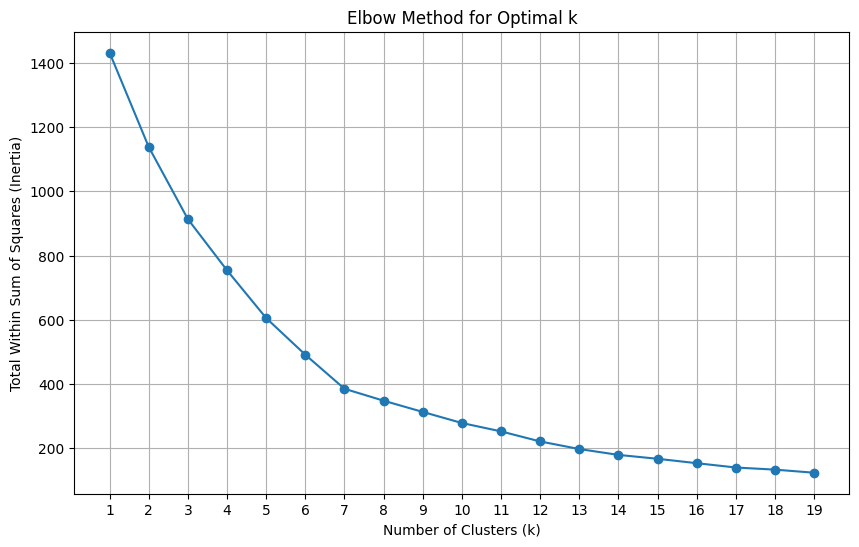

In [413]:
# Create a list to store the total within sum of squares (inertia) for different values of k (number of clusters)
inertias = []
k_range = range(1, 20)  # Change the range according to your preference, e.g., (1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(country_sc)
    inertias.append(kmeans.inertia_)

# Plot the number of clusters vs. total within sum of squares
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Within Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

- By looking ath the scree plot, we can say that the optimal number of clusters is 7